In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Create df with all reservors
Collect individual reservoir csv's into aggregated dataframes for inflow, outflow, storage, elevation, and evaporation. Select beginning of 1980 to 2020 for best coverage.

In [2]:
# Get list of all DAM_ID's
dam_ids = pd.read_csv('data/ResOpsUS/attributes/reservoir_attributes.csv')['DAM_ID']

In [3]:
len(dam_ids)

678

In [63]:
def collect_data(variable, start_date='1980-01-01', end_date='2020-12-31'):
    """
    Collect data from each reservoir into single dataframe 
    for the given variable, start, and end dates.
    variable -- str, 'inflow', 'outflow', 'storage', 'elevation', 'evaporation'
    start_date / end_date -- str, beginning and end dates for the collected data
    """

    # Concat 1980-2020 timeseries for each reservoir
    df = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date))

    for res in tqdm(dam_ids, desc='reading reservoir data'):
        # Read series from 1980 to 2020 for desired reservoir
        selected_series = pd.read_csv(f'data/ResOpsUS/time_series_all/ResOpsUS_{res}.csv', 
                        parse_dates=True, index_col=0).loc['1980-01-01':'2020-12-31', [variable]]
        # Rename column to reflect reservoir id
        selected_series.rename(columns={variable:res}, inplace=True)
        # Join with df
        df = df.merge(selected_series, how='left', right_index=True, left_index=True)

    return df

In [64]:
# Save results
vars = ['inflow', 'outflow', 'storage', 'elevation', 'evaporation']

for var in vars:
    df_temp = collect_data(var)
    df_temp.to_csv(f'data/ResOpsUS/time_series_aggregated/{var}.csv')

reading reservoir data: 100%|██████████| 678/678 [00:45<00:00, 14.97it/s]


### Missing data between 1980 and 2020
How much missing data do we include in the dataset?

In [65]:
# Read aggregated data
df_inflow = pd.read_csv('data/ResOpsUS/time_series_aggregated/inflow.csv',
                        index_col=0, parse_dates=True)
df_outflow = pd.read_csv('data/ResOpsUS/time_series_aggregated/outflow.csv',
                        index_col=0, parse_dates=True)
df_storage = pd.read_csv('data/ResOpsUS/time_series_aggregated/storage.csv',
                        index_col=0, parse_dates=True)

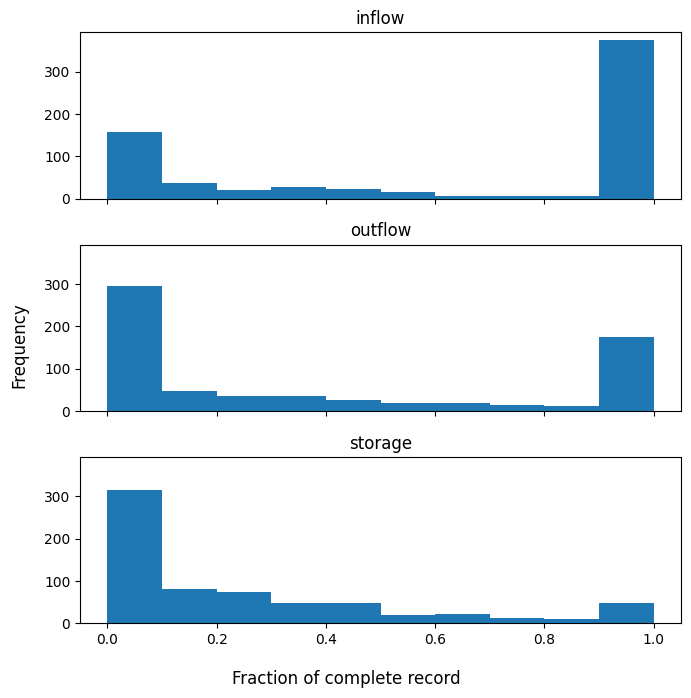

In [85]:
# Plot histograms for # of missing entries between 1980-2020
fig, ax = plt.subplots(nrows=3, figsize=(7, 7), sharex=True, sharey=True)
ax[0].hist(df_inflow.isna().sum(axis=0) / 14976)
ax[1].hist(df_outflow.isna().sum(axis=0) / 14976)
ax[2].hist(df_storage.isna().sum(axis=0) / 14976)

ax[0].set_title('inflow')
ax[1].set_title('outflow')
ax[2].set_title('storage')

fig.supylabel('Frequency')
fig.supxlabel('Fraction of complete record')

plt.tight_layout()
plt.show()

### (Exploration) Plot some inflows and outflows for selected reservoirs

In [95]:
# Reservoir id's with complete inflow AND outflow record
df_inflow.columns[(df_inflow.isna().sum(axis=0) == 0) &  (df_outflow.isna().sum(axis=0) == 0)]

Index(['55', '57', '60', '367', '372', '384', '386', '390', '423', '451',
       '473', '536', '541', '542', '575', '597', '601'],
      dtype='object')

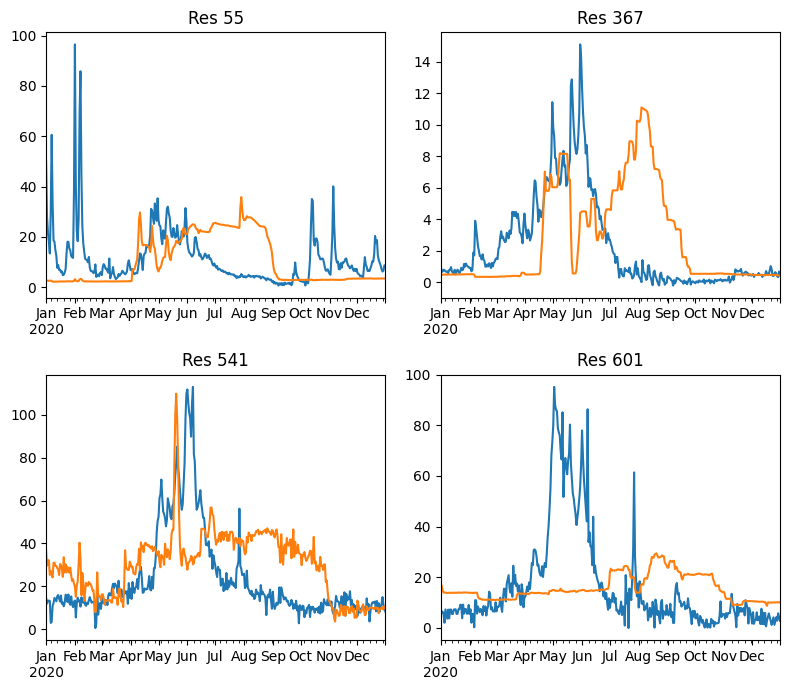

In [105]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))

df_inflow.loc['2020-01-01':'2020-12-31', '55'].plot(ax=ax[0, 0])
df_outflow.loc['2020-01-01':'2020-12-31', '55'].plot(ax=ax[0, 0])
ax[0, 0].set_title('Res 55')

df_inflow.loc['2020-01-01':'2020-12-31', '367'].plot(ax=ax[0, 1])
df_outflow.loc['2020-01-01':'2020-12-31', '367'].plot(ax=ax[0, 1])
ax[0, 1].set_title('Res 367')

df_inflow.loc['2020-01-01':'2020-12-31', '541'].plot(ax=ax[1, 0])
df_outflow.loc['2020-01-01':'2020-12-31', '541'].plot(ax=ax[1, 0])
ax[1, 0].set_title('Res 541')

df_inflow.loc['2020-01-01':'2020-12-31', '601'].plot(ax=ax[1, 1])
df_outflow.loc['2020-01-01':'2020-12-31', '601'].plot(ax=ax[1, 1])
ax[1, 1].set_title('Res 601')

plt.tight_layout()
plt.show()